### Gold Price Prediction with `Random Forest`

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [18]:
data_ds = pd.read_csv('./gld_price_data.csv')
data_ds

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [19]:
data_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [20]:
data_ds.shape

(2290, 6)

In [21]:
data_ds.tail() # get the last 5 rows

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [22]:
data_ds.isnull().sum() # check the missing values

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [23]:
data_ds.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [24]:
data_ds = data_ds.drop('Date', axis=1)


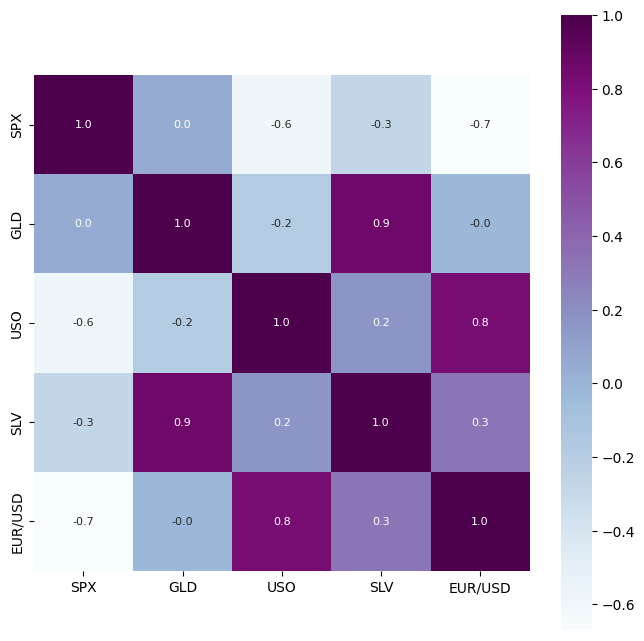

In [31]:
# positive correlation vs negative correlation
corr = data_ds.corr()

# constructe a heat-map for correlation

plt.figure(figsize=(8, 8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='BuPu')
plt.show();

In [32]:
corr

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


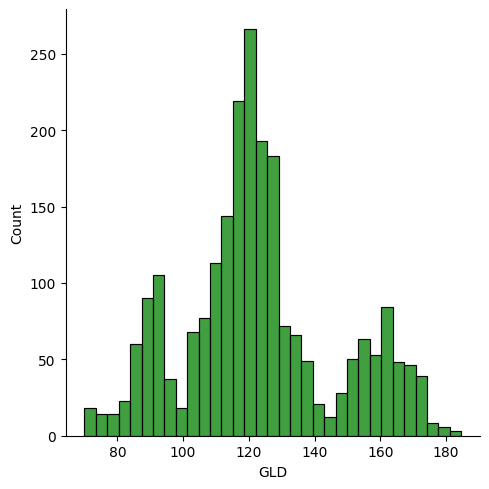

In [36]:
sns.displot(data_ds['GLD'], color='green')

In [38]:
X = data_ds.drop('GLD', axis=1)
y = data_ds['GLD']

In [40]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [41]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model_reg = RandomForestRegressor(n_estimators=100)

In [48]:
model_reg.fit(X=X_train, y=y_train)

RandomForestRegressor()

In [49]:
y_pred = model_reg.predict(X=X_test)

In [50]:
y_pred

array([122.54849959, 130.54850344, 127.56999998,  96.74019762,
       118.778401  , 114.57719935, 124.79960144, 117.8173989 ,
       108.0986011 ,  98.2104998 ,  95.36509905, 168.04279913,
       150.75120138, 116.28939991, 170.7939005 ,  85.0053994 ,
       123.00609878, 109.32129712, 113.19320048, 131.81570308,
       124.34829901, 113.66730108, 116.10520037, 108.85899974,
       108.64030153, 125.8305994 , 119.19070004, 112.3777994 ,
       113.48220116, 125.70549898, 145.80880176,  89.7159002 ,
       167.60009965, 113.54389934, 108.54270108, 120.31300082,
       141.60679856, 160.72810175, 174.25849806, 153.25990147,
       119.37690127, 113.66810057, 121.3500996 , 113.68719961,
       122.09983823, 108.0414005 ,  88.19859901, 114.42829913,
       129.83990257, 118.09180124, 103.80570035, 129.91330267,
       107.24849841, 159.80830386, 131.54049999, 118.25929948,
       147.52110085, 136.29600188,  95.32570137, 124.36670168,
       115.47259869,  86.32510059, 104.31309926, 113.83

In [51]:
r_score = metrics.r2_score(y_pred=y_pred, y_true=y_test)
r_score

0.9893598498694856

In [53]:
print(f'R squared score : {r_score}')

R squared score : 0.9893598498694856


In [54]:
y_test = list(y_test)

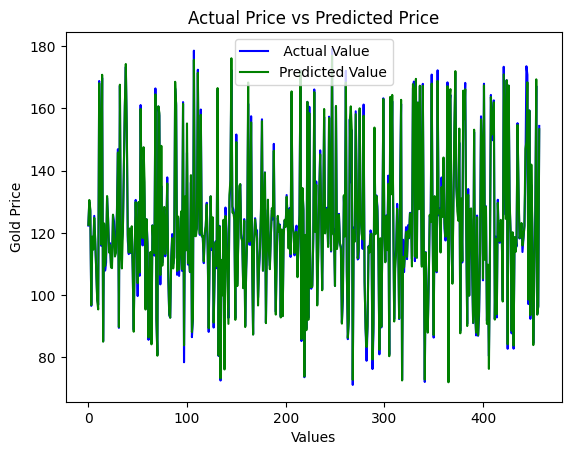

In [55]:
plt.plot(y_test, color='blue', label=' Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show();